In [1]:
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
import pandas as pd
import numpy as np

In [2]:
golf = pd.read_csv('golf.csv', delimiter='\t')
golf_original = golf.copy(deep = True)
golf

,Outlook,Temperature_Numeric,Temperature_Nominal,Humidity_Numeric,Humidity_Nominal,Windy,Play
0,overcast,81,hot,86,high,False,yes
1,overcast,82,hot,86,high,False,no
2,overcast,83,hot,86,high,False,yes
3,overcast,64,cool,65,normal,True,yes
4,overcast,72,mild,90,high,True,yes
5,overcast,81,hot,75,normal,False,yes
6,rainy,70,mild,96,high,False,yes
7,rainy,68,cool,80,normal,False,yes
8,rainy,65,cool,70,normal,True,no
9,rainy,75,mild,80,normal,False,yes


In [3]:
le_outlook = LabelEncoder()
ok = le_outlook.fit_transform(golf['Outlook'])
golf['Outlook'] = ok

le_temperature_nominal = LabelEncoder()
t_n = le_temperature_nominal.fit_transform(golf['Temperature_Nominal'])
golf['Temperature_Nominal'] = t_n

le_humidity_nominal = LabelEncoder()
h_n = le_humidity_nominal.fit_transform(golf['Humidity_Nominal'])
golf['Humidity_Nominal'] = h_n

le_windy = LabelEncoder()
windy = le_windy.fit_transform(golf['Windy'])
golf['Windy'] = windy


le_play = LabelEncoder()
play = le_play.fit_transform(golf['Play'])
golf.drop(columns=['Play'], inplace=True)
golf

#For his example, using only numerics
#golf.drop(columns=['Temperature_Numeric', 'Humidity_Numeric'], inplace = True)
golf.drop(columns=['Humidity_Numeric'], inplace = True)
golf

,Outlook,Temperature_Numeric,Temperature_Nominal,Humidity_Nominal,Windy
0,0,81,1,0,0
1,0,82,1,0,0
2,0,83,1,0,0
3,0,64,0,1,1
4,0,72,2,0,1
5,0,81,1,1,0
6,1,70,2,0,0
7,1,68,0,1,0
8,1,65,0,1,1
9,1,75,2,1,0


In [4]:
play

array([1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1])

In [15]:
#dt = DecisionTreeClassifier(max_depth = 2, criterion = 'entropy', min_samples_leaf = 2, random_state = 42)
dt = DecisionTreeClassifier(max_depth = 5, criterion = 'entropy', random_state = 42)
dt.fit(golf,play)
dt.score(golf,play)

0.9375

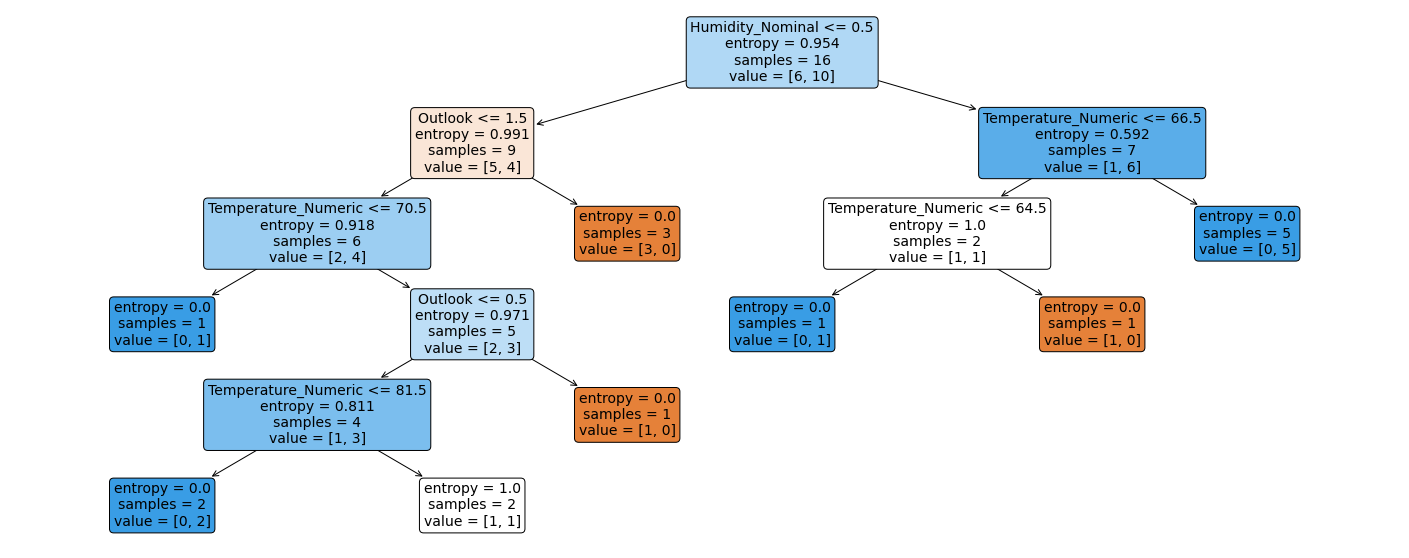

In [16]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
plt.figure(figsize=(25,10))
a = plot_tree(dt, 
              feature_names=golf.columns,  
              filled=True, 
              rounded=True, 
              fontsize=14)

In [7]:
dt.feature_importances_

array([0.4462963 , 0.33015873, 0.        , 0.22354497, 0.        ])

In [8]:
golf_original

,Outlook,Temperature_Numeric,Temperature_Nominal,Humidity_Numeric,Humidity_Nominal,Windy,Play
0,overcast,81,hot,86,high,False,yes
1,overcast,82,hot,86,high,False,no
2,overcast,83,hot,86,high,False,yes
3,overcast,64,cool,65,normal,True,yes
4,overcast,72,mild,90,high,True,yes
5,overcast,81,hot,75,normal,False,yes
6,rainy,70,mild,96,high,False,yes
7,rainy,68,cool,80,normal,False,yes
8,rainy,65,cool,70,normal,True,no
9,rainy,75,mild,80,normal,False,yes
